# Imaging

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from PIL import Image, ImageEnhance
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import numpy as np
from skimage import exposure

## Code

Define figure dimensions:

In [2]:
fig_width_mm = 88 # single column width for Nature Comms
fig_width_2col_mm = 180 # double column width for Nature Comms

mm = 1/25.4  # millimeters in inches

fig_width_inches = fig_width_mm * mm
fig_width_2col_inches = fig_width_2col_mm * mm

fig_height_inches = (4 / 3) * fig_width_2col_inches

Define default plot settings:

In [3]:
rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

### Ultrasound

Load ultrasound data:

In [4]:
df = pd.read_csv("imaging_data/glimpse_sonograph_feature_values_cell_position.csv")
df

,Cell,position_theta,position_z,position_theta_degrees,position_z_mm,amplitude,frequency
0,Glimpse1,0,0,0,68.65,0.037078,0.495523
1,Glimpse1,1,0,3,68.65,0.040361,0.472734
2,Glimpse1,2,0,6,68.65,0.041196,0.460581
3,Glimpse1,3,0,9,68.65,0.041578,0.439745
4,Glimpse1,4,0,12,68.65,0.041304,0.424797
...,...,...,...,...,...,...,...
7315,short_soak,115,20,345,12.65,0.097541,NaN
7316,short_soak,116,20,348,12.65,0.098501,NaN
7317,short_soak,117,20,351,12.65,0.103931,NaN
7318,short_soak,118,20,354,12.65,0.111921,NaN


Create heatmap:

In [5]:
# Filter data for the specific cell "Glimpse1"
glimpse1_data = df[df['Cell'] == 'Glimpse1']

# Get the unique values of position_z_mm and position_theta_degrees
unique_z = sorted(glimpse1_data['position_z_mm'].unique())
unique_theta = sorted(glimpse1_data['position_theta_degrees'].unique())

print("Unique position_z_mm values:", unique_z)
print("Unique position_theta_degrees values:", unique_theta)

# Pivot the data to create a matrix suitable for plotting with explicit sorting
pivot_table = glimpse1_data.pivot(index='position_z_mm', columns='position_theta_degrees', values='amplitude')

# Ensure the matrix matches the required shape by reindexing
pivot_table = pivot_table.reindex(index=unique_z, columns=unique_theta)

Unique position_z_mm values: [14.650000000000006, 17.650000000000006, 20.65000000000001, 23.65000000000001, 26.65000000000001, 29.65000000000001, 32.650000000000006, 35.650000000000006, 38.650000000000006, 41.650000000000006, 44.650000000000006, 47.650000000000006, 50.650000000000006, 53.650000000000006, 56.650000000000006, 59.650000000000006, 62.650000000000006, 65.65, 68.65]
Unique position_theta_degrees values: [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357]


### 2D X-ray

Load images:

In [6]:
image_2d_full = Image.open("imaging_data/unbinned_4680 4.tif")
image_2d_top = Image.open("imaging_data/unbinned_4680 1.tif")
image_2d_bottom = Image.open("imaging_data/unbinned_4680 2.tif")

Crop full image:

In [7]:
width, height = image_2d_full.size

left = int(0.25 * width)
right = int(0.75 * width)
top = 0
bottom = height

image_2d_full = image_2d_full.crop((left, top, right, bottom))

Crop top image:

In [8]:
left = 0
right = width
top = int(0.35 * height)
bottom = int(0.55 * height)

image_2d_top = image_2d_top.crop((left, top, right, bottom))

Crop bottom image:

In [9]:
top = int(0.37 * height)
bottom = int(0.57 * height)
image_2d_bottom = image_2d_bottom.crop((left, top, right, bottom))

Apply histogram equalization:

In [10]:
image_2d_full = exposure.equalize_hist(np.array(image_2d_full))
image_2d_top = exposure.equalize_hist(np.array(image_2d_top))
image_2d_bottom = exposure.equalize_hist(np.array(image_2d_bottom))

### 3D X-ray

Load images:

In [11]:
image_ct_radial = Image.open("imaging_data/4889_FC468025XG0101002886_z=40mm.png")
image_ct_axial = Image.open("imaging_data/4889_FC468025XG0101002886_angle=80deg.png")

Retain transparency for `image_ct_radial`:

In [12]:
image_ct_radial_numpy = np.array(image_ct_radial)
image_ct_radial_numpy[image_ct_radial_numpy == 0] = 255

Crop radial image:

In [13]:
width_radial, height_radial = image_ct_radial.size

crop_limit = 0.4
crop_limit_inverse = 1 - crop_limit
left_radial = int(crop_limit * width_radial)
right_radial = int(crop_limit_inverse * width_radial)
top_radial = int(crop_limit * height_radial)
bottom_radial = int(crop_limit_inverse * height_radial)

image_ct_radial_cropped = image_ct_radial.crop((left_radial, top_radial, right_radial, bottom_radial))

Crop axial image:

In [14]:
width_axial, height_axial = image_ct_axial.size

left_axial = 0
right_axial = width_axial

crop_limit_top = 0.15
top_axial = 0
bottom_axial = int(crop_limit_top * height_axial)
image_ct_axial_top = image_ct_axial.crop((left_axial, top_axial, right_axial, bottom_axial))

crop_limit_bottom = 0.1
top_axial = int((1 - crop_limit_bottom) * height_axial)
bottom_axial = int(1 * height_axial)
image_ct_axial_bottom = image_ct_axial.crop((left_axial, top_axial, right_axial, bottom_axial))

Increase image brighntess:

In [15]:
def increase_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

In [16]:
image_ct_axial = increase_brightness(image_ct_axial, 1.5)
image_ct_axial_top = increase_brightness(image_ct_axial_top, 1.5)
image_ct_axial_bottom = increase_brightness(image_ct_axial_bottom, 1.5)

## Plot

In [17]:
def add_scale_bar(ax, physical_length_mm, pixel_size, x_start, y_start, bar_height=5, color='white'):
    """
    Add a scale bar to a matplotlib plot.

    Parameters:
    - ax: matplotlib axis object where the scale bar will be added.
    - physical_length_mm: Length of the scale bar in micrometers.
    - pixel_size: Size of one pixel in micrometers.
    - bar_height: Height of the scale bar in pixels. Default is 5.
    - color: Color of the scale bar. Default is white.
    - loc: Location of the scale bar. Default is 'lower right'. Options: 'lower right', 'lower left', 'upper right', 'upper left', 'lower center'.
    """
    # Calculate the length of the scale bar in pixels
    physical_length_um = physical_length_mm * 1000
    pixel_length = physical_length_um / pixel_size
    
    # Draw the scale bar
    ax.add_patch(plt.Rectangle((x_start, y_start), pixel_length, bar_height, color=color))
    
    # Add text to indicate the physical length
    ax.text(x_start + pixel_length / 2, y_start + bar_height - 5, f'{physical_length_mm} mm', color=color,
            ha='center', va='bottom')


Ugly plotting cell:

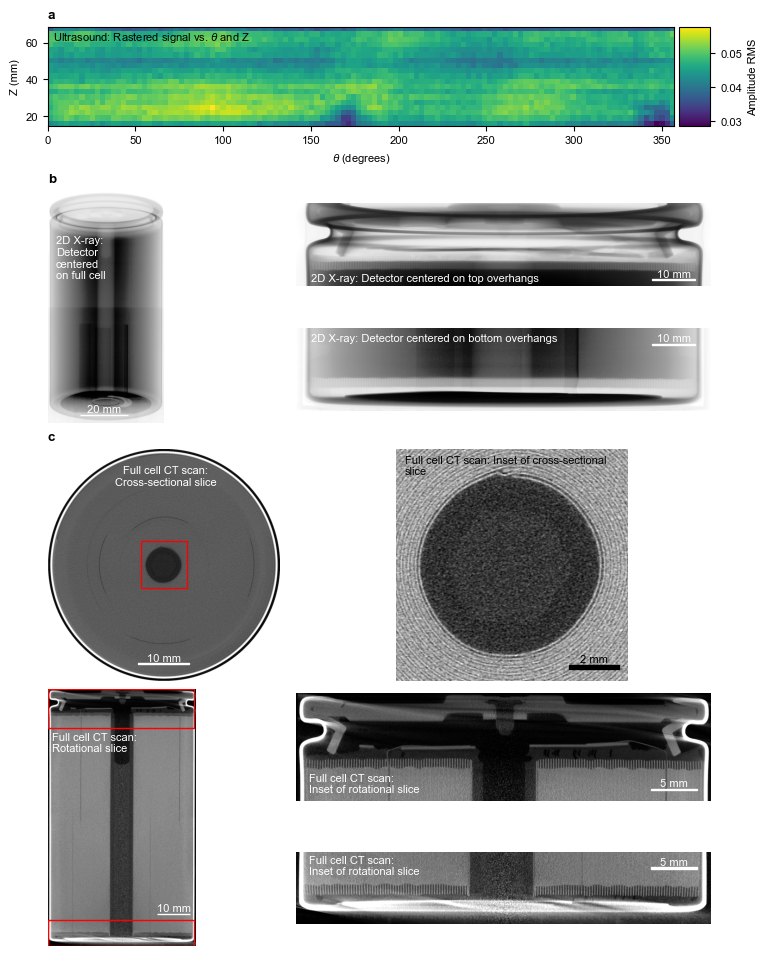

In [18]:
mosaic_str = """
AAAAAAAA
AAAAAAAA
BBBCCCCC
BBBCCCCC
BBBDDDDD
BBBDDDDD
EEEEFFFF
EEEEFFFF
EEEEFFFF
EEEEFFFF
GGGHHHHH
GGGHHHHH
GGGIIIII
GGGIIIII
"""

fig, axd = plt.subplot_mosaic(mosaic=mosaic_str, figsize=(fig_width_2col_inches, fig_height_inches), layout="constrained")

#### Add the ultrasound heatmap
im = axd["A"].imshow(pivot_table, aspect='auto', cmap='viridis', origin='lower', extent=[min(unique_theta), max(unique_theta), min(unique_z), max(unique_z)])
axd["A"].set_xlabel('$\\theta$ (degrees)')
axd["A"].set_ylabel('Z (mm)')
axd["A"].set_title('a', loc='left', fontweight='bold')

divider = make_axes_locatable(axd['A'])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical', label='Amplitude RMS')


#### Add the 2D images
axd["B"].set_title('b', loc='left', fontweight='bold')
axd["B"].axis('off')
axd["C"].axis('off')
axd["D"].axis('off')

axd["B"].set_anchor('W')

axd["B"].imshow(image_2d_full, cmap="gray")
axd["C"].imshow(image_2d_top, cmap="gray")
axd["D"].imshow(image_2d_bottom, cmap="gray")

add_scale_bar(axd["B"], 20, 34, x_start=400, y_start=2750, bar_height=5, color='white')
add_scale_bar(axd["C"], 10, 34, x_start=2450, y_start=520, bar_height=5, color='white')
add_scale_bar(axd["D"], 10, 34, x_start=2450, y_start=110, bar_height=5, color='white')


#### Add the CT images
axd["E"].set_title('c', loc='left', fontweight='bold')
axd["E"].axis('off')
axd["F"].axis('off')
axd["G"].axis('off')
axd["H"].axis('off')
axd["I"].axis('off')

axd["E"].set_anchor('W')
axd["F"].set_anchor('W')
axd["G"].set_anchor('W')

axd["E"].imshow(image_ct_radial_numpy, cmap="gray")
axd["F"].imshow(image_ct_radial_cropped, cmap="gray")
axd["G"].imshow(image_ct_axial, cmap="gray")
axd["H"].imshow(image_ct_axial_top, cmap="gray")
axd["I"].imshow(image_ct_axial_bottom, cmap="gray")

# Add red boxes
rect = patches.Rectangle((left_radial, top_radial),
                         int(2 * (0.5 - crop_limit) * height_radial), int(2 * (0.5 - crop_limit) * height_radial),
                         linewidth=1, edgecolor='r', facecolor='none')
axd["E"].add_patch(rect)

rect = patches.Rectangle((left_axial, 0),
                         right_axial - 10, int(crop_limit_top * height_axial),
                         linewidth=1, edgecolor='r', facecolor='none')
axd["G"].add_patch(rect)

rect = patches.Rectangle((left_axial, int((1 - crop_limit_bottom) * height_axial)),
                         right_axial - 10, height_axial - int((1 - crop_limit_bottom) * height_axial),
                         linewidth=1, edgecolor='r', facecolor='none')
axd["G"].add_patch(rect)


# Add scale bars
add_scale_bar(axd["E"], 10, 34, x_start=523, y_start=1242, bar_height=5, color='white')
add_scale_bar(axd["F"], 2, 34, x_start=200, y_start=250, bar_height=5, color='black')
add_scale_bar(axd["G"], 10, 34, x_start=1000, y_start=2050, bar_height=5, color='white')
add_scale_bar(axd["H"], 5, 34, x_start=1150, y_start=310, bar_height=5, color='white')
add_scale_bar(axd["I"], 5, 34, x_start=1150, y_start=50, bar_height=5, color='white')

## Add annotations
axd["A"].text(3, 59, "Ultrasound: Rastered signal vs. $\\theta$ and Z", color="black", ha='left', va='bottom')

axd["B"].text(100, 1100, "2D X-ray:\nDetector\ncentered\non full cell", color="white", ha='left', va='bottom')
axd["C"].text(100, 550, "2D X-ray: Detector centered on top overhangs", color="white", ha='left', va='bottom')
axd["D"].text(100, 110, "2D X-ray: Detector centered on bottom overhangs", color="white", ha='left', va='bottom')

axd["E"].text(680, 210, "Full cell CT scan:\nCross-sectional slice", color="white", ha='center')
axd["F"].text(10, 32, "Full cell CT scan: Inset of cross-sectional\nslice", color="black", ha='left', va='bottom')
axd["G"].text(40, 590, "Full cell CT scan:\nRotational slice", color="white", ha='left', va='bottom')
axd["H"].text(40, 330, "Full cell CT scan:\nInset of rotational slice", color="white", ha='left', va='bottom')
axd["I"].text(40, 80, "Full cell CT scan:\nInset of rotational slice", color="white", ha='left', va='bottom')

plt.savefig("imaging.pdf", dpi=300, bbox_inches="tight", format="pdf")